In [1]:
from graphviz import Source
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝


# Step 41

In [2]:
from dezero import Variable as v
import dezero.functions as F
import numpy as np

x = v(np.random.randn(2,3))
W = v(np.random.randn(3,4))
y = F.matmul(x, W)
y.backward()

print(x.grad.shape)
print(W.grad.shape)

(2, 3)
(3, 4)


# Step 42 - Linear Regression

### make toy dataset

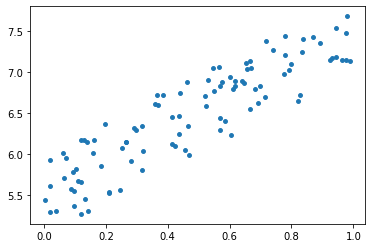

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)   # 시드값 고정
x = np.random.rand(100, 1)
y = 5 + 2*x + np.random.rand(100, 1)    # y에 무작위 noise 추가

plt.scatter(x, y, s=15)
plt.show()

### implement linear regression

In [12]:
import numpy as np
from dezero import Variable as v
import dezero.functions as F

x, y = v(x), v(y)   # 생략 가능 (dezero는 ndarray 인스턴스도 내부에서 Variable 인스턴스로 변환함)

W = v(np.zeros((1,1)))
b = v(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

def mean_squared_error(x0, x1): # MSE
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)


In [13]:
lr = 0.1
iters = 100

for i in range(1, iters+1):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    if i % 10 == 0:
        print(W, b, loss)

variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.46228843]]) variable([5.26973075]) variable(0.10181280604960243)
variable([[2.40310116]]) variable([5.32037549]) variable(0.09512298485383605)
variable([[2.34459602]]) variable([5.35121993]) variable(0.09065081640275062)
variable([[2.29308646]]) variable([5.37739285]) variable(0.08723906096725743)
variable([[2.2480595]]) variable([5.40021536]) variable(0.08463466440508784)
variable([[2.20871786]]) variable([5.42015291]) variable(0.08264656764154595)
variable([[2.17434477]]) variable([5.43757232]) variable(0.0811289305635685)
variable([[2.1443128]]) variable([5.45279175]) variable(0.07997042442704135)
variable([[2.11807369]]) variable([5.46608905]) variable(0.07908606512411756)


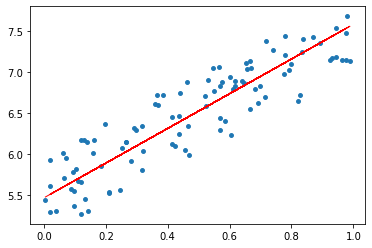

In [14]:
X, Y = x.data, y.data

plt.plot(X, W.data*X+b.data, c='r', linewidth=1)
plt.scatter(X, Y, s=15)
plt.show()

### **dezero's MSE(more memory efficiency)**

In [15]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2*x + np.random.rand(100, 1)    # y에 무작위 noise 추가
x, y = v(x), v(y) 

W = v(np.zeros((1,1)))
b = v(np.zeros(1))

lr = 0.1
iters = 100

for i in range(1, iters+1):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)  # changed

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    if i % 10 == 0:
        print(W, b, loss)

variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.46228843]]) variable([5.26973075]) variable(0.10181280604960243)
variable([[2.40310116]]) variable([5.32037549]) variable(0.09512298485383605)
variable([[2.34459602]]) variable([5.35121993]) variable(0.09065081640275062)
variable([[2.29308646]]) variable([5.37739285]) variable(0.08723906096725743)
variable([[2.2480595]]) variable([5.40021536]) variable(0.08463466440508784)
variable([[2.20871786]]) variable([5.42015291]) variable(0.08264656764154595)
variable([[2.17434477]]) variable([5.43757232]) variable(0.0811289305635685)
variable([[2.1443128]]) variable([5.45279175]) variable(0.07997042442704135)
variable([[2.11807369]]) variable([5.46608905]) variable(0.07908606512411756)


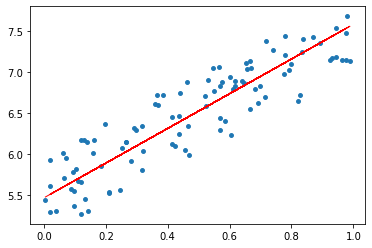

In [16]:
X, Y = x.data, y.data

plt.plot(X, W.data*X+b.data, c='r', linewidth=1)
plt.scatter(X, Y, s=15)
plt.show()